<a href="https://colab.research.google.com/github/suryatejakotla/recognize-handwritten-digits/blob/main/NEURALNETWORK_USING_MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install numpy pandas matplotlib tensorflow pillow


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [4]:
from PIL import Image, ImageOps
import numpy as np


In [5]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [6]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

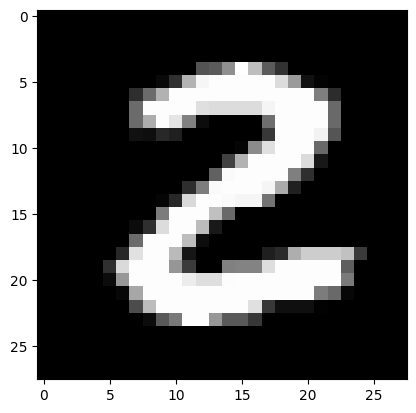

In [11]:
# Display the first image in the training dataset
plt.imshow(x_train[25], cmap='gray')
plt.show()


In [12]:
model = Sequential([
 Flatten(input_shape=(28, 28)),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])

In [13]:
# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
# Train the model
model.fit(x_train, y_train, epochs=20)


Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2607 - accuracy: 0.9250
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1128 - accuracy: 0.9666
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0773 - accuracy: 0.9766
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0576 - accuracy: 0.9824
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0448 - accuracy: 0.9857
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0363 - accuracy: 0.9887
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0278 - accuracy: 0.9914
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0218 - accuracy: 0.9933
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0176 - accuracy: 0.9949
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.015

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.1053 - accuracy: 0.9787
Accuracy: 97.87%


In [17]:
def preprocess_image(image_path):
 img = Image.open(image_path).convert('L')
 img = ImageOps.invert(img)
 img = img.resize((28, 28))
 img = np.array(img) / 255.0
 img = img.reshape(1, 28, 28)
 return img

In [19]:
# Path to the handwritten digit image
image_path = '/content/digit.png'
new_image = preprocess_image(image_path)

1/1 [==============================] - 0s 29ms/step
Predicted Digit: 5


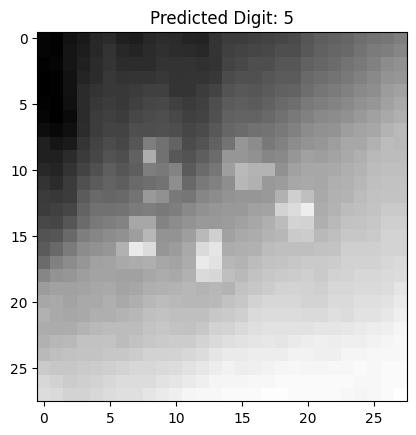

In [27]:
# Predict the digit
prediction = model.predict(new_image)
predicted_digit = np.argmax(prediction)
print(f"Predicted Digit: {predicted_digit}")
plt.imshow(new_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()